# Импорт библиотек

In [41]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import missingno as msno
import os
from tqdm import tqdm
from datetime import timedelta
from dateutil.relativedelta import relativedelta

## Рассмотрим в начале данные отдельного региона

In [4]:
data = pd.read_csv('data/Санкт-Петербург/DATTSVT.csv',index_col=False,sep='\t')

<ipython-input-4-42092d7f73d8>:1: DtypeWarning: Columns (3,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/Санкт-Петербург/DATTSVT.csv',index_col=False,sep='\t')


In [5]:
data

,napr,period,nastranapr,tnved,edizm,Stoim,Netto,Kol,Region,Region_s
0,ЭК,07/2021,AM,3506910000,NaN,"66,53",162,0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1,ЭК,09/2021,BG,3506910000,NaN,"89,7","0,4",0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2,ИМ,01/2021,BY,3506910000,NaN,"240,87","2,36",0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3,ИМ,02/2021,BY,3506910000,NaN,"1509,18","742,52",0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4,ЭК,02/2021,BY,3506910000,NaN,"487,48","116,02",0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...,...
458954,ИМ,04/2021,US,8414594000,796.0,"889,72","19,71",6,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
458955,ИМ,09/2021,US,8414108900,796.0,"2378,34","2,52",6,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
458956,ЭК,05/2021,UZ,8414108900,796.0,2416,46,1,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
458957,ИМ,01/2021,CN,8414202000,796.0,"32352,98","6692,88",41195,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


Посмотрим на суммарные колличественные характеристики:
- по колонке napr (импорт/экспор)
- по колонке tnved (код товара)

In [6]:
pd.DataFrame(data['napr'].value_counts())

,napr
ИМ,318489
ЭК,140470


In [7]:
pd.DataFrame(data['tnved'].value_counts())

,tnved
3926909709,1033
4016930005,792
7326909807,770
8708299009,647
8421990008,647
...,...
5509210000,1
4114101000,1
5405000000,1
2517410000,1


Удалим неинформативные колонки и строки с пропусками в колонке nastranapr (страна)

In [8]:
data = data.drop(['Region','Region_s'],axis=1)[data['nastranapr'].notna()]

Посмотрим на распределение стран импортерев 

<AxesSubplot: ylabel='nastranapr'>

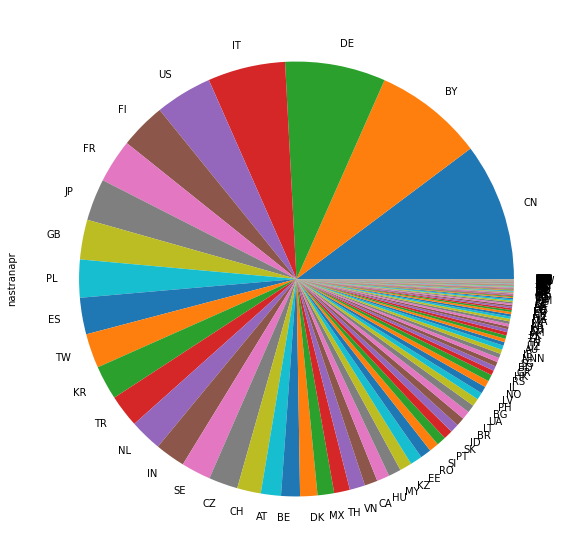

In [9]:
data.loc[data['napr'] == 'ИМ']['nastranapr'].value_counts().plot.pie(y='count', figsize=(10, 10))

In [10]:
(pd.DataFrame(data.loc[data['napr'] == 'ИМ']['nastranapr'].value_counts()))

,nastranapr
CN,32605
BY,25886
DE,23804
IT,18358
US,13469
...,...
BS,1
VI,1
KW,1
SN,1


<AxesSubplot: >

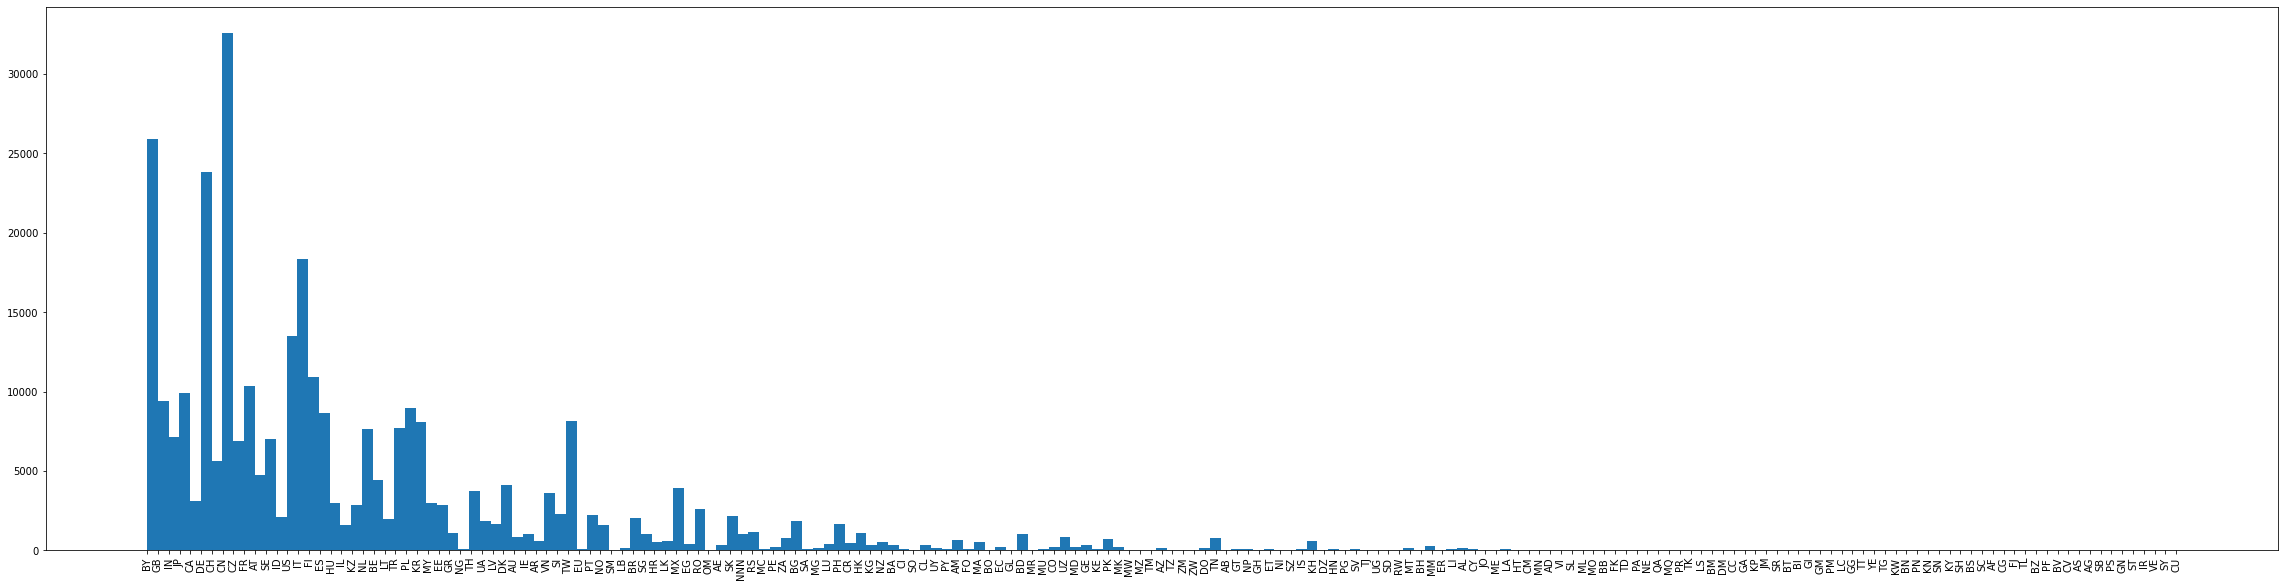

In [12]:
data.loc[data['napr'] == 'ИМ']['nastranapr'].hist(xrot=90, figsize=(40,10),grid=False,bins=len(data.loc[data['napr'] == 'ИМ']['nastranapr'].unique()))

# Теперь посмотрим на все данные

Чтение файлов

In [16]:
dirpath = './data'
file_list = os.listdir(dirpath)

In [17]:
df = pd.DataFrame()
for filename in os.listdir(dirpath):
    filepath = os.path.join(dirpath, filename, 'DATTSVT.csv')
    data_new = pd.read_csv(filepath, sep='\t')
    
    df = pd.concat([df, data_new])
        
df

<ipython-input-17-345f7e928bda>:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_new = pd.read_csv(filepath, sep='\t')
<ipython-input-17-345f7e928bda>:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_new = pd.read_csv(filepath, sep='\t')
<ipython-input-17-345f7e928bda>:4: DtypeWarning: Columns (3,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_new = pd.read_csv(filepath, sep='\t')
<ipython-input-17-345f7e928bda>:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_new = pd.read_csv(filepath, sep='\t')
<ipython-input-17-345f7e928bda>:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_new = pd.read_csv(filepath, sep='\t')
<ipython-input-17-345f7e928bda>:4: DtypeWarning: Columns (3) have mixed types. Specify dtype optio

,napr,period,nastranapr,tnved,edizm,Stoim,Netto,Kol,Region,Region_s
0,ИМ,04/2021,US,3506100000,NaN,2475,"0,816",0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1,ИМ,10/2021,GB,3507909000,NaN,1188,"0,03",0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2,ИМ,08/2021,IL,3507909000,NaN,340,"0,03",0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3,ЭК,04/2021,KZ,3808932700,NaN,268979,69120,0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4,ЭК,04/2021,KZ,3707100000,NaN,"412,45",2,0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...,...
12409,ИМ,05/2021,DE,3814009000,NaN,"1841,93",286,0,34000 - КОСТРОМСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
12410,ИМ,11/2021,PK,3907690000,NaN,"120663,27",122800,0,34000 - КОСТРОМСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
12411,ИМ,05/2021,BY,3907690000,NaN,"76242,34",81533,0,34000 - КОСТРОМСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
12412,ИМ,06/2021,CN,3907610000,NaN,"50716,95",44000,0,34000 - КОСТРОМСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [18]:
df = df.reset_index(drop=True)
df.head(5)

,napr,period,nastranapr,tnved,edizm,Stoim,Netto,Kol,Region,Region_s
0,ИМ,04/2021,US,3506100000,NaN,2475,"0,816",0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1,ИМ,10/2021,GB,3507909000,NaN,1188,"0,03",0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2,ИМ,08/2021,IL,3507909000,NaN,340,"0,03",0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3,ЭК,04/2021,KZ,3808932700,NaN,268979,69120,0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4,ЭК,04/2021,KZ,3707100000,NaN,"412,45",2,0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


Переведем колличественные характеристики в колонки с подходящим типом данных (числовым)

In [21]:
df['Stoim'] = df['Stoim'].apply(lambda x: float(x.replace(',', '.')))
type(df.Stoim[0])

numpy.float64

In [22]:
df['Netto'] = df['Netto'].apply(lambda x: float(x.replace(',', '.')))
type(df.Netto[0])

numpy.float64

In [23]:
df['Kol'] = df['Kol'].apply(lambda x: float(x.replace(',', '.')) if type(x) == str else float(x))
type(df.Kol[0])

numpy.float64

Выведем описательные характеристики получившегося датасета

In [24]:
df.describe()

,edizm,Stoim,Netto,Kol
count,1.609125e+06,4.913026e+06,4.913026e+06,4.913026e+06
mean,7.146864e+02,1.599454e+05,2.124955e+05,2.781081e+05
std,2.237820e+02,5.622249e+06,1.041032e+07,1.575135e+08
min,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.960000e+02,3.578200e+02,9.630000e+00,0.000000e+00
50%,7.960000e+02,2.750690e+03,1.520000e+02,0.000000e+00
75%,7.960000e+02,2.100727e+04,2.760000e+03,5.000000e+00
max,8.650000e+02,2.723443e+09,4.764781e+09,1.854458e+11


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913026 entries, 0 to 4913025
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   napr        object 
 1   period      object 
 2   nastranapr  object 
 3   tnved       object 
 4   edizm       float64
 5   Stoim       float64
 6   Netto       float64
 7   Kol         float64
 8   Region      object 
 9   Region_s    object 
dtypes: float64(4), object(6)
memory usage: 374.8+ MB


In [26]:
cols = df.columns
for col in cols:
    print(f"Характеристика: {col}")
    print(f"Количество уникальных значений: {df[col].nunique()}")
#     print(f"Список значений: {df[col]}")
#     print(df[col])
    print('///////////////////////////////////////////////////')

Характеристика: napr
Количество уникальных значений: 2
///////////////////////////////////////////////////
Характеристика: period
Количество уникальных значений: 12
///////////////////////////////////////////////////
Характеристика: nastranapr
Количество уникальных значений: 244
///////////////////////////////////////////////////
Характеристика: tnved
Количество уникальных значений: 20351
///////////////////////////////////////////////////
Характеристика: edizm
Количество уникальных значений: 21
///////////////////////////////////////////////////
Характеристика: Stoim
Количество уникальных значений: 2240610
///////////////////////////////////////////////////
Характеристика: Netto
Количество уникальных значений: 1328508
///////////////////////////////////////////////////
Характеристика: Kol
Количество уникальных значений: 181513
///////////////////////////////////////////////////
Характеристика: Region
Количество уникальных значений: 85
//////////////////////////////////////////////////

## Data Cleaning

Почистим датасет от пропусков

In [20]:
print('Размер выбоpки: {}, {}'.format(df.shape[0], df.shape[1]))

Размер выбоpки: 4913026, 10


Исследуем датасет на наличие пропусков

In [21]:
df.isna().sum()

napr                0
period              0
nastranapr        239
tnved               0
edizm         3303901
Stoim               0
Netto               0
Kol                 0
Region              0
Region_s            0
dtype: int64

### edizm

In [22]:
df.edizm

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
4913021    796.0
4913022      NaN
4913023    796.0
4913024      NaN
4913025    796.0
Name: edizm, Length: 4913026, dtype: object

In [23]:
df[df.edizm.isna() == True]

,napr,period,nastranapr,tnved,edizm,Stoim,Netto,Kol,Region,Region_s
0,ИМ,05/2021,IN,3507909000,NaN,3414.01,50.000,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1,ЭК,02/2021,KZ,3808911000,NaN,4020.47,741.809,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2,ЭК,04/2021,KZ,3808932700,NaN,73875.00,8249.727,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3,ЭК,09/2021,KZ,3808932700,NaN,14184.26,2023.609,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4,ЭК,12/2021,KZ,3808932700,NaN,92.32,3.545,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...,...
4913011,ЭК,12/2021,BY,8432900000,NaN,464.37,50.000,0.0,78000 - ЯРОСЛАВСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4913012,ИМ,10/2021,IN,8431498009,NaN,2789.72,275.000,0.0,78000 - ЯРОСЛАВСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4913018,ИМ,12/2021,DE,8412908009,NaN,1537.22,72.000,0.0,78000 - ЯРОСЛАВСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4913022,ЭК,11/2021,DE,8413302008,NaN,170.05,0.600,0.0,78000 - ЯРОСЛАВСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


Построим на матрицу заполненности датасета

<AxesSubplot:>

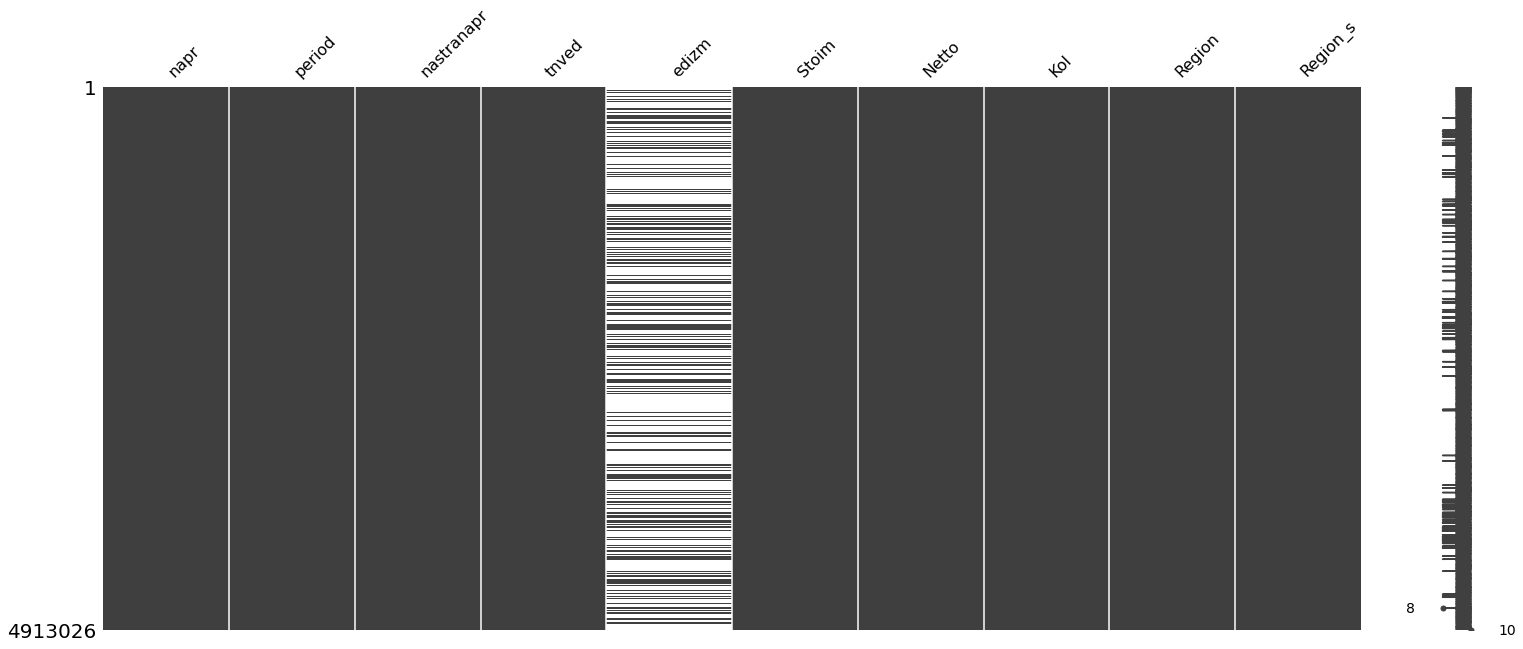

In [24]:
msno.matrix(df)

<AxesSubplot:>

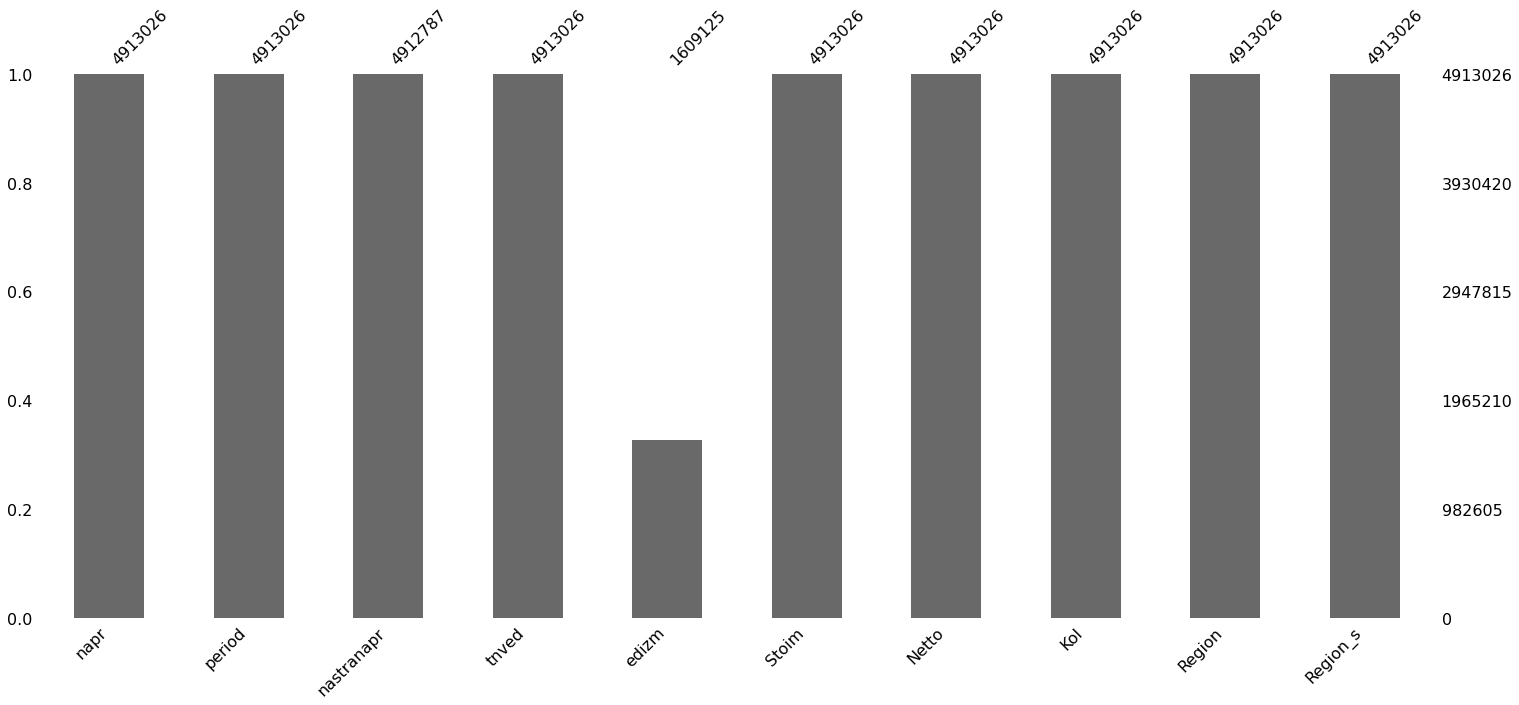

In [25]:
msno.bar(df)

Удаляем колонку "edizm" тк она имеет большое кол-во пропусков, что ухудшит результат исследования

In [27]:
df = df.drop('edizm', axis=1)
df = df

### nastranapr

Посмотрим внимательнее на пропуски в колонке "nastranapr"

In [28]:
df[df.nastranapr.isna() == True]

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
54410,ЭК,05/2021,NaN,8402900001,18713.04,4.300000e+03,0.0,67000 - СЕВАСТОПОЛЬ - ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
167768,ЭК,02/2021,NaN,8708299009,1446.00,1.700000e+01,0.0,73000 - УЛЬЯНОВСКАЯ ОБЛАСТЬ,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
207883,ИМ,02/2021,NaN,806101000,46106.69,1.787950e+04,0.0,03000 - КРАСНОДАРСКИЙ КРАЙ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
208802,ЭК,08/2021,NaN,1001990000,3815668.75,1.539210e+07,0.0,03000 - КРАСНОДАРСКИЙ КРАЙ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
233808,ЭК,02/2021,NaN,1001990000,4435771.70,1.737098e+07,0.0,03000 - КРАСНОДАРСКИЙ КРАЙ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...
4682974,ИМ,12/2021,NaN,7325999009,3400.13,3.854300e+01,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4690884,ИМ,08/2021,NaN,8501310000,85.57,2.000000e-02,1.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4692139,ИМ,11/2021,NaN,8501522001,1206.23,5.500000e+01,2.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4703717,ЭК,11/2021,NaN,9705000000,3340.00,1.200000e+01,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [29]:
nastranapr_nan = df[df.nastranapr.isna() == True]

In [30]:
nastranapr_nan[nastranapr_nan.napr == 'ИМ']

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
207883,ИМ,02/2021,NaN,806101000,46106.69,17879.500,0.0,03000 - КРАСНОДАРСКИЙ КРАЙ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
246473,ИМ,07/2021,NaN,9705000000,5995.69,100.000,0.0,03000 - КРАСНОДАРСКИЙ КРАЙ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
246474,ИМ,10/2021,NaN,9705000000,18120.00,298.000,0.0,03000 - КРАСНОДАРСКИЙ КРАЙ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
269738,ИМ,01/2021,NaN,0806101000,83680.80,35945.500,0.0,03000 - КРАСНОДАРСКИЙ КРАЙ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
725971,ИМ,02/2021,NaN,806101000,123140.50,71539.500,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...
4623072,ИМ,08/2021,NaN,3920208000,2540.17,2.000,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4682974,ИМ,12/2021,NaN,7325999009,3400.13,38.543,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4690884,ИМ,08/2021,NaN,8501310000,85.57,0.020,1.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4692139,ИМ,11/2021,NaN,8501522001,1206.23,55.000,2.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [31]:
nastranapr_nan[nastranapr_nan.napr == 'ЭК']

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
54410,ЭК,05/2021,NaN,8402900001,18713.04,4300.00,0.0,67000 - СЕВАСТОПОЛЬ - ГОРОД ФЕДЕРАЛЬНОГО ЗНАЧЕНИЯ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
167768,ЭК,02/2021,NaN,8708299009,1446.00,17.00,0.0,73000 - УЛЬЯНОВСКАЯ ОБЛАСТЬ,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
208802,ЭК,08/2021,NaN,1001990000,3815668.75,15392100.00,0.0,03000 - КРАСНОДАРСКИЙ КРАЙ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
233808,ЭК,02/2021,NaN,1001990000,4435771.70,17370980.00,0.0,03000 - КРАСНОДАРСКИЙ КРАЙ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
446086,ЭК,04/2021,NaN,9018501000,2255.19,0.18,0.0,61000 - РЯЗАНСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...
4244685,ЭК,02/2021,NaN,8467219900,162.00,8.00,2.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4249168,ЭК,02/2021,NaN,8467229000,30.00,4.00,1.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4433740,ЭК,02/2021,NaN,8467295100,21.00,4.00,1.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4561911,ЭК,02/2021,NaN,8467295900,48.00,4.00,1.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [32]:
nastranapr_nan[nastranapr_nan.Stoim > 100000]

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
208802,ЭК,08/2021,NaN,1001990000,3815668.75,15392100.0,0.0,03000 - КРАСНОДАРСКИЙ КРАЙ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
233808,ЭК,02/2021,NaN,1001990000,4435771.70,17370980.0,0.0,03000 - КРАСНОДАРСКИЙ КРАЙ,03-ЮЖНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
725971,ИМ,02/2021,NaN,806101000,123140.50,71539.5,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
870961,ИМ,12/2021,NaN,806101000,130823.74,73677.0,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
943683,ЭК,12/2021,NaN,4911990000,1340887.24,5760.0,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
950368,ИМ,01/2021,NaN,806101000,156246.17,89519.2,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1552550,ЭК,04/2021,NaN,3102309000,359792.69,1800000.0,613200.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1552551,ЭК,09/2021,NaN,3102309000,271724.97,1000000.0,340000.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1552552,ЭК,12/2021,NaN,3102309000,826677.40,2498750.0,849575.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1569015,ЭК,06/2021,NaN,3102309000,307687.39,1304500.0,444740.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


Оставим данные по импрорту и экспорту с большими значениями стоимости, тк они могут внести существенный вклад в статистику

In [33]:
df = df.dropna()
df = pd.concat([df, nastranapr_nan[nastranapr_nan.Stoim > 100000]])
df

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
0,ИМ,04/2021,US,3506100000,2475.00,0.816,0.0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1,ИМ,10/2021,GB,3507909000,1188.00,0.030,0.0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2,ИМ,08/2021,IL,3507909000,340.00,0.030,0.0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3,ЭК,04/2021,KZ,3808932700,268979.00,69120.000,0.0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4,ЭК,04/2021,KZ,3707100000,412.45,2.000,0.0,80000 - РЕСПУБЛИКА БАШКОРТОСТАН,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...
1552550,ЭК,04/2021,NaN,3102309000,359792.69,1800000.000,613200.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1552551,ЭК,09/2021,NaN,3102309000,271724.97,1000000.000,340000.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1552552,ЭК,12/2021,NaN,3102309000,826677.40,2498750.000,849575.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1569015,ЭК,06/2021,NaN,3102309000,307687.39,1304500.000,444740.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


Посмотрим как теперь изменился наш датасет

In [34]:
pd.DataFrame(df['napr'].value_counts())

,napr
ИМ,2920056
ЭК,1992742


In [35]:
pd.DataFrame(df['tnved'].value_counts())

,tnved
3926909709,13398
7326909807,11247
4016930005,9632
3926909709,9013
7326909409,8411
...,...
4808400001,1
2009491100,1
8418610011,1
307879000,1


<AxesSubplot: ylabel='nastranapr'>

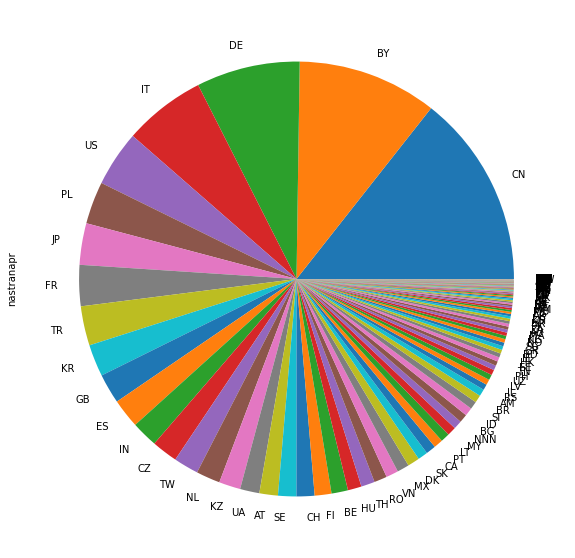

In [36]:
df.loc[df['napr'] == 'ИМ']['nastranapr'].value_counts().plot.pie(y='count', figsize=(10, 10))

<AxesSubplot: ylabel='nastranapr'>

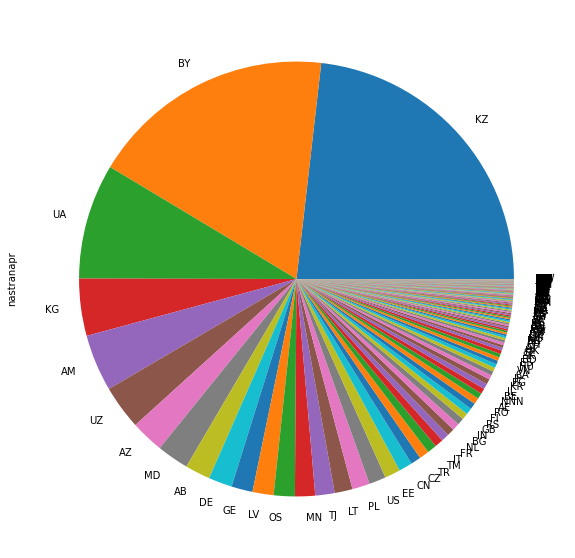

In [37]:
df.loc[df['napr'] == 'ЭК']['nastranapr'].value_counts().plot.pie(y='count', figsize=(10, 10))

### Выбросы

Исследуем наш датасет на наличие выбросов при помощи квантилей

In [37]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

#### Stoim

In [38]:
boundaries = calculate_outliers(df.Stoim)
boundaries

(-30619.016249999997, 51985.93375)

In [39]:
if df.Stoim.max() < boundaries[1]:
    print('максимум входит в границы')
else:
    print('максимум не входит в границы')
    
if df.Stoim.min() > boundaries[0]:
    print('минимум входит в границы')
else:
    print('минимум не входит в границы')
    
#Посчитаем и выведем количество выбросов
is_outlier = (df.Stoim < boundaries[0]) | (df.Stoim > boundaries[1]) 
print('количество выбросов -', is_outlier.sum())
#Посчитаем и выведем долю выбросов
print('доля выбросов', is_outlier.sum() / len(df.Stoim))

максимум не входит в границы
минимум входит в границы
количество выбросов - 768671
доля выбросов 0.15646297690236807


In [40]:
df[is_outlier]

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
2,ЭК,04/2021,KZ,3808932700,73875.0000,8249.727,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
17,ИМ,12/2021,TR,3907610000,129850.8000,88000.000,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
31,ИМ,09/2021,CN,3304990000,97275.9500,7572.100,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
49,ЭК,05/2021,KZ,3304990000,65448.7087,6245.705,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
50,ЭК,06/2021,KZ,3304990000,91329.8653,8344.594,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...
4072338,ИМ,01/2021,NaN,806101000,156246.1700,89519.200,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4590434,ЭК,04/2021,NaN,3102309000,359792.6900,1800000.000,613200.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4590435,ЭК,09/2021,NaN,3102309000,271724.9700,1000000.000,340000.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4590436,ЭК,12/2021,NaN,3102309000,826677.4000,2498750.000,849575.0,70000 - ТУЛЬСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [41]:
df[df.Stoim < 0]

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s


In [42]:
print(df.Stoim.max())
print(df.Stoim.min())

2723443497.78
0.0


Text(0.5, 1.0, 'Ящик с усами для стоимости (с аномалиями)')

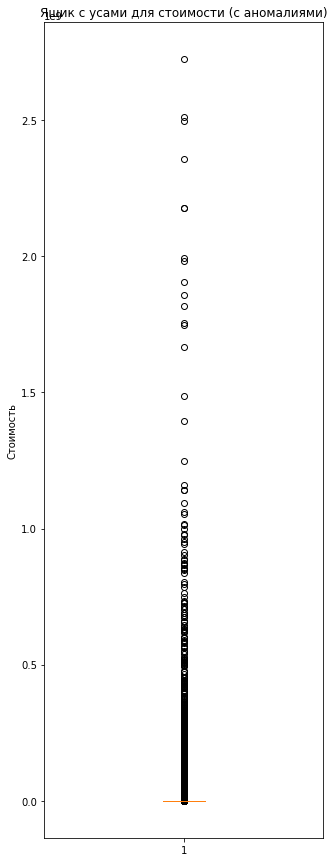

In [43]:
fig, ax = plt.subplots(figsize=(5, 15))
ax.boxplot(df.Stoim)
ax.set_ylabel('Стоимость')
ax.set_title('Ящик с усами для стоимости (с аномалиями)')


Провели исследование при помощи интерквантильного исследоввания данных, а также построили график показывающй большое кол-во объектом, стоимость которых не входит в нормальное распределение

In [44]:
df[is_outlier].sort_values(by='Stoim').tail(15)

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
1051177,ЭК,01/2021,CN,2709009009,1.486227e+09,3.840924e+09,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2037475,ЭК,10/2021,IT,XXXXXXXXXX,1.666062e+09,5.928000e+01,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1051178,ЭК,02/2021,CN,2709009009,1.748929e+09,4.201460e+09,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2036457,ЭК,12/2021,IT,XXXXXXXXXX,1.756873e+09,4.384000e+01,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1814769,ЭК,04/2021,CN,2709009009,1.817043e+09,4.042604e+09,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2038148,ЭК,11/2021,IT,XXXXXXXXXX,1.857350e+09,0.000000e+00,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1696874,ЭК,05/2021,CN,2709009009,1.904210e+09,3.990821e+09,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1492778,ЭК,03/2021,CN,2709009009,1.984378e+09,4.505874e+09,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1508014,ЭК,06/2021,CN,2709009009,1.995810e+09,3.928375e+09,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1167061,ЭК,07/2021,CN,2709009009,2.177370e+09,4.201276e+09,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


### Netto

In [45]:
boundaries = calculate_outliers(df.Netto)
boundaries

(-4115.925, 6885.555)

In [46]:
print(df.Netto.max())
print(df.Netto.min())

4764780935.0
0.0


In [47]:
if df.Netto.max() < boundaries[1]:
    print('максимум входит в границы')
else:
    print('максимум не входит в границы')
    
if df.Netto.min() > boundaries[0]:
    print('минимум входит в границы')
else:
    print('минимум не входит в границы')
    
#Посчитаем и выведем количество выбросов
is_outlier = (df.Netto < boundaries[0]) | (df.Netto > boundaries[1]) 
print('количество выбросов -', is_outlier.sum())
#Посчитаем и выведем долю выбросов
print('доля выбросов', is_outlier.sum() / len(df.Netto))

максимум не входит в границы
минимум входит в границы
количество выбросов - 918712
доля выбросов 0.18700382144757427


Text(0.5, 1.0, 'Ящик с усами для стоимости (с аномалиями)')

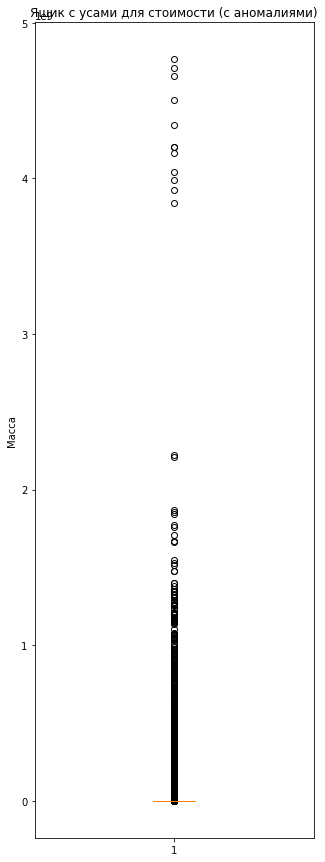

In [48]:
fig, ax = plt.subplots(figsize=(5, 15))
ax.boxplot(df.Netto)
ax.set_ylabel('Масса')
ax.set_title('Ящик с усами для стоимости (с аномалиями)')

Провели исследование при помощи интерквантильного исследоввания данных, а также построили график показывающй большое кол-во объектом, масса которых не входит в нормальное распределение

In [49]:
df[is_outlier].sort_values(by='Netto').tail(15)

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
2006547,ЭК,10/2021,NL,2709009009,9.623213e+08,1.869825e+09,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1507296,ЭК,05/2021,NL,2709009009,9.807303e+08,2.211263e+09,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4211115,ЭК,06/2021,KR,2709009009,1.062436e+09,2.224217e+09,0.0,64000 - САХАЛИНСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1051177,ЭК,01/2021,CN,2709009009,1.486227e+09,3.840924e+09,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1508014,ЭК,06/2021,CN,2709009009,1.995810e+09,3.928375e+09,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1696874,ЭК,05/2021,CN,2709009009,1.904210e+09,3.990821e+09,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1814769,ЭК,04/2021,CN,2709009009,1.817043e+09,4.042604e+09,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1341262,ЭК,09/2021,CN,2709009009,2.178597e+09,4.166399e+09,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1167061,ЭК,07/2021,CN,2709009009,2.177370e+09,4.201276e+09,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1051178,ЭК,02/2021,CN,2709009009,1.748929e+09,4.201460e+09,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


### Kol

In [50]:
boundaries = calculate_outliers(df.Kol)
boundaries

(-7.5, 12.5)

In [51]:
print(df.Kol.max())
print(df.Kol.min())

185445750000.0
0.0


In [52]:
if df.Kol.max() < boundaries[1]:
    print('максимум входит в границы')
else:
    print('максимум не входит в границы')
    
if df.Kol.min() > boundaries[0]:
    print('минимум входит в границы')
else:
    print('минимум не входит в границы')
    
#Посчитаем и выведем количество выбросов
is_outlier = (df.Kol < boundaries[0]) | (df.Kol > boundaries[1]) 
print('количество выбросов -', is_outlier.sum())
#Посчитаем и выведем долю выбросов
print('доля выбросов', is_outlier.sum() / len(df.Kol))

максимум не входит в границы
минимум входит в границы
количество выбросов - 1056818
доля выбросов 0.21511529682270675


Text(0.5, 1.0, 'Ящик с усами для стоимости (с аномалиями)')

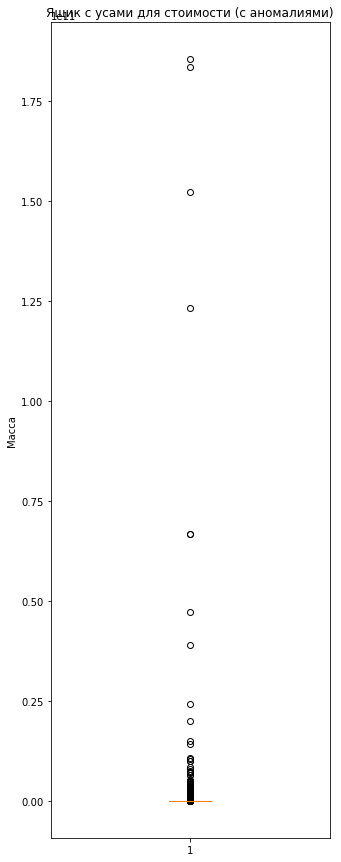

In [53]:
fig, ax = plt.subplots(figsize=(5, 15))
ax.boxplot(df.Kol)
ax.set_ylabel('Масса')
ax.set_title('Ящик с усами для стоимости (с аномалиями)')

Провели исследование при помощи интерквантильного исследоввания данных, а также построили график показывающй большое кол-во объектом, кол-во которых не входит в нормальное распределение

In [54]:
df[is_outlier].sort_values(by='Kol').tail(15)

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
108178,ИМ,10/2021,ES,0106490009,1990.49,20.000,1.000002e+10,14000 - БЕЛГОРОДСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
83105,ИМ,03/2021,UA,0106900090,335817.83,10152.450,1.050776e+10,14000 - БЕЛГОРОДСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1667323,ИМ,01/2021,BE,106490009,65826.56,865.000,1.081401e+10,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2497398,ИМ,02/2021,NL,106900090,18908.83,200.800,1.420910e+10,46000 - МОСКОВСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
68419,ИМ,06/2021,ES,0106490009,10229.17,56.000,1.500070e+10,14000 - БЕЛГОРОДСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
83473,ИМ,11/2021,ES,0106490009,3850.56,50.000,2.000000e+10,14000 - БЕЛГОРОДСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
68414,ИМ,08/2021,GB,0106900090,31953.36,1387.510,2.422620e+10,14000 - БЕЛГОРОДСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
108014,ИМ,07/2021,GB,0106900090,36315.28,1444.110,3.893875e+10,14000 - БЕЛГОРОДСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2497400,ИМ,08/2021,NL,106900090,29645.71,196.396,4.719700e+10,46000 - МОСКОВСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1047765,ИМ,03/2021,BE,106490009,68486.52,427.000,6.677476e+10,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [55]:
df.describe()

,Stoim,Netto,Kol
count,4.912798e+06,4.912798e+06,4.912798e+06
mean,1.599524e+05,2.125053e+05,2.781210e+05
std,5.622380e+06,1.041056e+07,1.575172e+08
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.578400e+02,9.630000e+00,0.000000e+00
50%,2.750780e+03,1.520000e+02,0.000000e+00
75%,2.100908e+04,2.760000e+03,5.000000e+00
max,2.723443e+09,4.764781e+09,1.854458e+11


При исследовании выяснилось, что в некоторых колонках, отвечающих за колличественные характеристики, есть нули

In [56]:
df[df.Netto == 0.0].Stoim.max()

1857349836.76

In [57]:
df[df.Netto == 0.0]

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
40203,ИМ,11/2021,MN,2716000000,28090.64,0.0,2.006470e+03,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
40204,ЭК,12/2021,MN,2716000000,3350185.85,0.0,4.198701e+04,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
40211,ЭК,04/2021,CN,2716000000,11810108.23,0.0,2.473360e+05,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
40212,ЭК,08/2021,CN,2716000000,19910331.33,0.0,4.207379e+05,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
40213,ЭК,10/2021,CN,2716000000,24844889.54,0.0,5.181466e+05,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...
4156917,ЭК,07/2021,KZ,2711210000,0.00,0.0,5.514262e+08,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4156919,ЭК,08/2021,KZ,2711210000,0.00,0.0,4.471010e+08,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4156921,ЭК,09/2021,KZ,2711210000,0.00,0.0,2.033950e+08,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4156923,ЭК,10/2021,KZ,2711210000,0.00,0.0,3.289307e+08,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [58]:
df[df.Netto == 0.0].describe()

,Stoim,Netto,Kol
count,7.490000e+02,749.0,7.490000e+02
mean,1.517939e+07,0.0,2.729715e+08
std,7.828047e+07,0.0,6.605713e+08
min,0.000000e+00,0.0,0.000000e+00
25%,0.000000e+00,0.0,9.440000e+00
50%,1.505000e+02,0.0,4.207379e+05
75%,2.634686e+06,0.0,2.254161e+08
max,1.857350e+09,0.0,4.898462e+09


In [38]:
print('Stoim = 0:', df[df.Stoim == 0.0].Stoim.count())
print('Netto = 0:', df[df.Netto == 0.0].Netto.count())
print('Kol = 0:', df[df.Kol == 0.0].Kol.count())

Stoim = 0: 430
Netto = 0: 749
Kol = 0: 3259686


### Исследуем отдельно нули в каждой колонке

In [39]:
df[df.Stoim == 0.]     

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
376283,ЭК,04/2021,TJ,7214991000,0.0,6.869500e+04,0.0,75000 - ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,05-УРАЛЬСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
927283,ЭК,12/2021,UA,8546200000,0.0,4.332000e+02,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
936407,ИМ,12/2021,US,3904692000,0.0,1.780000e+00,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1033416,ИМ,12/2021,KZ,2711210000,0.0,6.853077e+08,795943849.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1033417,ЭК,12/2021,KZ,2711210000,0.0,0.000000e+00,683073167.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...
4707398,ЭК,01/2021,CH,2711210000,0.0,0.000000e+00,33995451.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4707399,ЭК,02/2021,CH,2711210000,0.0,0.000000e+00,30705213.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4707400,ЭК,03/2021,CH,2711210000,0.0,0.000000e+00,33833263.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4722095,ЭК,06/2021,FR,8481309108,0.0,8.000000e-01,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


Эти значния не имеют для нас статистической значимости, поэтому чуть позже удалим их

In [40]:
netto_0 = df[df.Netto == 0.]
# netto_0_im = netto_0[netto_0.napr == 'ИМ']

In [62]:
netto_0[netto_0.Stoim > 1000000]

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
40204,ЭК,12/2021,MN,2716000000,3350185.85,0.0,41987.01,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
40211,ЭК,04/2021,CN,2716000000,11810108.23,0.0,247336.01,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
40212,ЭК,08/2021,CN,2716000000,19910331.33,0.0,420737.86,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
40213,ЭК,10/2021,CN,2716000000,24844889.54,0.0,518146.63,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
40215,ЭК,02/2021,MN,2716000000,1989142.72,0.0,24539.41,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...
4155514,ИМ,06/2021,KZ,XXXXXXXXXX,11792902.27,0.0,0.00,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4155515,ИМ,07/2021,KZ,XXXXXXXXXX,11628412.73,0.0,0.00,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4155694,ИМ,11/2021,KZ,XXXXXXXXXX,15934585.11,0.0,0.00,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4155752,ИМ,03/2021,KZ,XXXXXXXXXX,11527665.77,0.0,0.00,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [63]:
netto_0[netto_0.Stoim > 100000] # оставляем!

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
40204,ЭК,12/2021,MN,2716000000,3350185.85,0.0,41987.01,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
40211,ЭК,04/2021,CN,2716000000,11810108.23,0.0,247336.01,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
40212,ЭК,08/2021,CN,2716000000,19910331.33,0.0,420737.86,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
40213,ЭК,10/2021,CN,2716000000,24844889.54,0.0,518146.63,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
40215,ЭК,02/2021,MN,2716000000,1989142.72,0.0,24539.41,10000 - АМУРСКАЯ ОБЛАСТЬ,07-ДАЛЬНЕВОСТОЧНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...
4155514,ИМ,06/2021,KZ,XXXXXXXXXX,11792902.27,0.0,0.00,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4155515,ИМ,07/2021,KZ,XXXXXXXXXX,11628412.73,0.0,0.00,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4155694,ИМ,11/2021,KZ,XXXXXXXXXX,15934585.11,0.0,0.00,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4155752,ИМ,03/2021,KZ,XXXXXXXXXX,11527665.77,0.0,0.00,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


Оставим в выборке объекты импорта с значениями с нулевой массой, но большой стоимостью, остальные нулевые значения массы удалим

In [64]:
df[df.Kol == 0.] 

,napr,period,nastranapr,tnved,Stoim,Netto,Kol,Region,Region_s
0,ИМ,05/2021,IN,3507909000,3414.01,50.000,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
1,ЭК,02/2021,KZ,3808911000,4020.47,741.809,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2,ЭК,04/2021,KZ,3808932700,73875.00,8249.727,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3,ЭК,09/2021,KZ,3808932700,14184.26,2023.609,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4,ЭК,12/2021,KZ,3808932700,92.32,3.545,0.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...,...
1555551,ИМ,12/2021,NaN,307119000,109973.25,7578.000,0.0,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3847941,ИМ,02/2021,NaN,806101000,123140.50,71539.500,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3992931,ИМ,12/2021,NaN,806101000,130823.74,73677.000,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4065653,ЭК,12/2021,NaN,4911990000,1340887.24,5760.000,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


Слишком большое кол-во 0 (незаполненные данных). Их нельзя восстановить или удалить полностью. Не будем рассматривать эту колонку

Удаление статистически незначимых данных

In [65]:
df = df[df.Stoim != 0.] 

In [66]:
df = df[df.Netto != 0.]
df = pd.concat([df, netto_0[netto_0.Stoim > 100000]])

In [67]:
df = df.drop('Kol', axis=1)

In [68]:
df.shape

(4912267, 8)

### Иследуем незаполненные данные в коде товара

In [69]:
df[df.tnved == 'XXXXXXXXXX'].sort_values(by='Stoim')

,napr,period,nastranapr,tnved,Stoim,Netto,Region,Region_s
2914846,ЭК,10/2021,KZ,XXXXXXXXXX,5.100000e-01,0.300,52000 - ОМСКАЯ ОБЛАСТЬ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
634596,ЭК,04/2021,BY,XXXXXXXXXX,6.700000e-01,0.020,29000 - КАЛУЖСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
634580,ЭК,06/2021,BY,XXXXXXXXXX,6.900000e-01,0.020,29000 - КАЛУЖСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
3707243,ИМ,11/2021,VE,XXXXXXXXXX,6.900000e-01,0.144,36000 - САМАРСКАЯ ОБЛАСТЬ,04-ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2590325,ЭК,01/2021,AM,XXXXXXXXXX,7.800000e-01,0.050,46000 - МОСКОВСКАЯ ОБЛАСТЬ,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...
2036509,ЭК,12/2021,DE,XXXXXXXXXX,1.161662e+09,7456.509,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2037918,ЭК,08/2021,IT,XXXXXXXXXX,1.248805e+09,21.240,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2037475,ЭК,10/2021,IT,XXXXXXXXXX,1.666062e+09,59.280,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
2036457,ЭК,12/2021,IT,XXXXXXXXXX,1.756873e+09,43.840,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,01-ЦЕНТРАЛЬНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


Сделаем два датасета:
1. Где нет незаполненных данных по коду товара
2. Где есть незаполненные коды товара с большой стоимостью

In [70]:
kod = df[df.tnved == 'XXXXXXXXXX']
kod[kod.Stoim > 100000]

,napr,period,nastranapr,tnved,Stoim,Netto,Region,Region_s
38943,ИМ,12/2021,CN,XXXXXXXXXX,638238.61,62928.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
38948,ЭК,07/2021,US,XXXXXXXXXX,3345678.35,316115.2,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
38955,ЭК,05/2021,IR,XXXXXXXXXX,564609.47,874170.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
38959,ЭК,03/2021,IR,XXXXXXXXXX,387720.63,498500.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
38961,ЭК,06/2021,US,XXXXXXXXXX,4561891.71,449055.5,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
...,...,...,...,...,...,...,...,...
4155514,ИМ,06/2021,KZ,XXXXXXXXXX,11792902.27,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4155515,ИМ,07/2021,KZ,XXXXXXXXXX,11628412.73,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4155694,ИМ,11/2021,KZ,XXXXXXXXXX,15934585.11,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
4155752,ИМ,03/2021,KZ,XXXXXXXXXX,11527665.77,0.0,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,02-СЕВЕРО-ЗАПАДНЫЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [71]:
df = df[df.tnved != 'XXXXXXXXXX']
df.to_csv('data_cleanKod.csv')

In [72]:
df[df.tnved == 'XXXXXXXXXX']

,napr,period,nastranapr,tnved,Stoim,Netto,Region,Region_s


In [73]:
df_kodX = pd.concat([df, kod[kod.Stoim > 100000]])

In [74]:
df_kodX.to_csv('data_not_cleanKod.csv')

In [75]:
print('df:', df.shape)
print('df_kodX:', df_kodX.shape)

df: (4905291, 8)
df_kodX: (4908411, 8)


## Исследование зависимостей

<AxesSubplot:ylabel='nastranapr'>

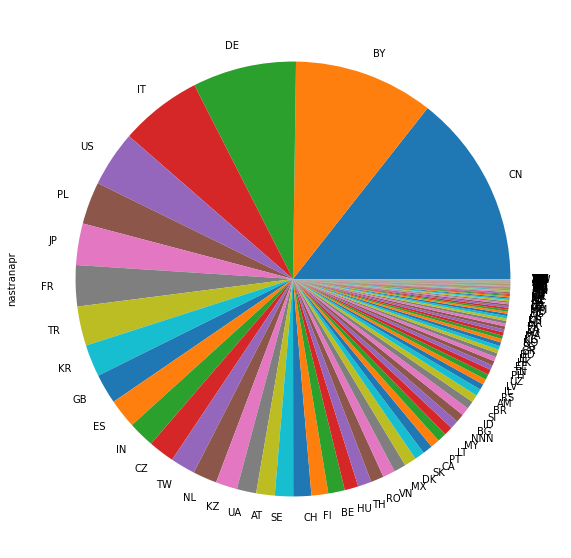

In [76]:
df.loc[df['napr'] == 'ИМ']['nastranapr'].value_counts().plot.pie(y='count', figsize=(10, 10))

In [79]:
stats_napr_Stoim = df.groupby(['napr'], as_index=False)[['Stoim']].sum()
print(stats_napr_Stoim)
print('///////////////////')

stats_napr_Netto = df.groupby(['napr'], as_index=False)[['Netto']].sum()
print(stats_napr_Netto)
print('///////////////////')


  napr         Stoim
0   ИМ  2.796375e+11
1   ЭК  4.189696e+11
///////////////////
  napr         Netto
0   ИМ  1.224712e+11
1   ЭК  9.035597e+11
///////////////////


In [80]:
df_im = df[df.napr == 'ИМ']
df_im.head(4)

,napr,period,nastranapr,tnved,Stoim,Netto,Region,Region_s
0,ИМ,05/2021,IN,3507909000,3414.01,50.0,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
10,ИМ,06/2021,KZ,3506100000,91.81,16.1,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
11,ИМ,07/2021,KZ,3506100000,15.65,2.3,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ
12,ИМ,08/2021,KZ,3506100000,72.38,11.5,01000 - АЛТАЙСКИЙ КРАЙ,06-СИБИРСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ


In [81]:
stats_period_Stoim = df_im.groupby(['period'], as_index=False)[['Stoim']].sum()
print(stats_period_Stoim)
print('////////////////////////////')

stats_period_Netto = df_im.groupby(['period'], as_index=False)[['Netto']].sum()
print(stats_period_Netto)
print('////////////////////////////')

     period         Stoim
0   01/2021  1.655867e+10
1   02/2021  1.964479e+10
2   03/2021  2.399454e+10
3   04/2021  2.377631e+10
4   05/2021  2.223707e+10
5   06/2021  2.344024e+10
6   07/2021  2.358311e+10
7   08/2021  2.341871e+10
8   09/2021  2.404380e+10
9   10/2021  2.466602e+10
10  11/2021  2.596712e+10
11  12/2021  2.830709e+10
////////////////////////////
     period         Netto
0   01/2021  8.141281e+09
1   02/2021  7.989921e+09
2   03/2021  1.032321e+10
3   04/2021  1.077757e+10
4   05/2021  1.073916e+10
5   06/2021  1.116356e+10
6   07/2021  1.070274e+10
7   08/2021  1.053607e+10
8   09/2021  1.035469e+10
9   10/2021  1.039668e+10
10  11/2021  1.064337e+10
11  12/2021  1.070294e+10
////////////////////////////


Text(0.5, 0, 'период')

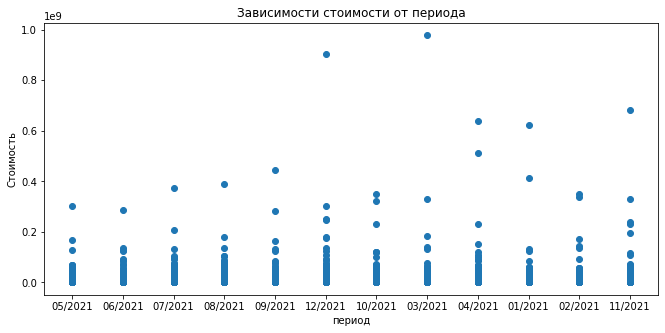

In [82]:
plt.figure(figsize=(11, 5))
plt.scatter(df_im['period'], df_im['Stoim'],)
plt.title('Зависимости стоимости от периода')
plt.ylabel('Стоимость')
plt.xlabel('период')

Text(0.5, 0, 'период')

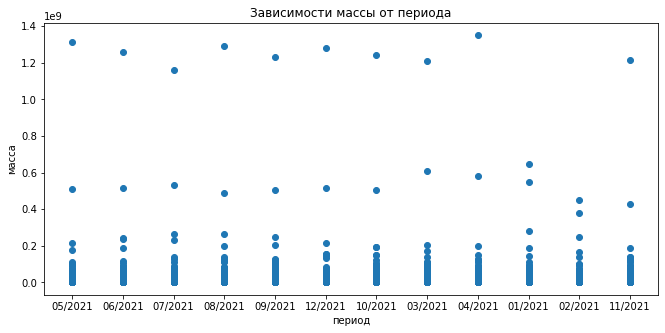

In [83]:
plt.figure(figsize=(11, 5))
plt.scatter(df_im['period'], df_im['Netto'],)
plt.title('Зависимости массы от периода')
plt.ylabel('масса')
plt.xlabel('период')

In [84]:
stats_nastranapr_Stoim = df_im.groupby(['nastranapr'], as_index=False)[['Stoim']].sum()
print(stats_nastranapr_Stoim)
print('////////////////////////////')

stats_nastranapr_Netto = df_im.groupby(['nastranapr'], as_index=False)[['Netto']].sum()
print(stats_nastranapr_Netto)
print('////////////////////////////')


    nastranapr         Stoim
0           AB  7.023239e+07
1           AD  4.976562e+04
2           AE  2.148411e+08
3           AF  4.722184e+06
4           AG  1.918170e+03
..         ...           ...
227         WF  1.185190e+03
228         YE  1.573317e+05
229         ZA  7.968114e+08
230         ZM  1.575014e+07
231         ZW  3.484610e+07

[232 rows x 2 columns]
////////////////////////////
    nastranapr         Netto
0           AB  6.722306e+07
1           AD  6.096535e+02
2           AE  6.482788e+07
3           AF  3.627590e+06
4           AG  8.372000e+01
..         ...           ...
227         WF  5.653255e+00
228         YE  2.161264e+04
229         ZA  1.316557e+09
230         ZM  5.104551e+06
231         ZW  9.454271e+06

[232 rows x 2 columns]
////////////////////////////


In [85]:
df_im.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917022 entries, 0 to 2005627
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   napr        object 
 1   period      object 
 2   nastranapr  object 
 3   tnved       object 
 4   Stoim       float64
 5   Netto       float64
 6   Region      object 
 7   Region_s    object 
dtypes: float64(2), object(6)
memory usage: 200.3+ MB


In [94]:
un_countries = pd.unique(df['nastranapr'])
len(un_countries)

241

In [95]:
un_countries_im = pd.unique(df.loc[df['napr'] == 'ИМ']['nastranapr'])
len(un_countries_im)

233

In [96]:
un_countries_ex = pd.unique(df.loc[df['napr'] == 'ЭК']['nastranapr'])
len(un_countries_ex)

208

Сделаем два датасета:
1. С данными экспорта
2. С данными импорта

In [97]:
df_im = df[df['napr'] == 'ИМ']
df_im.shape

(2917022, 8)

In [98]:
df_ex = df[df['napr'] == 'ЭК']
df_ex.shape

(1988269, 8)

### df_im

Посмотрим отдельно на датасет с импортом

In [99]:
dict_of_cn_st = {}
for c in un_countries:
    dict_of_cn_st[c] = (df_im.nastranapr == c).sum()
    
dict_of_cn_st = {k: v for k, v in sorted(dict_of_cn_st.items(), key=lambda item: item[1])}

In [100]:
dict_of_cn_st

{'DJ': 0,
 'IO': 0,
 'GW': 0,
 'AW': 0,
 'VC': 0,
 'WS': 0,
 'SX': 0,
 'KI': 0,
 nan: 0,
 'GS': 1,
 'MF': 1,
 'TO': 1,
 'GU': 1,
 'CK': 1,
 'FM': 1,
 'VU': 1,
 'AQ': 1,
 'TC': 1,
 'PM': 1,
 'IM': 1,
 'MH': 2,
 'SB': 2,
 'GG': 2,
 'JE': 2,
 'CC': 2,
 'IQ': 3,
 'GI': 3,
 'GP': 3,
 'AG': 3,
 'GQ': 3,
 'PF': 3,
 'AX': 3,
 'UM': 3,
 'CV': 3,
 'BV': 3,
 'VA': 3,
 'AO': 4,
 'GM': 4,
 'KM': 4,
 'BW': 4,
 'TV': 4,
 'NR': 5,
 'MS': 5,
 'TF': 5,
 'BT': 5,
 'MP': 5,
 'YE': 6,
 'BJ': 6,
 'RE': 6,
 'WF': 6,
 'KP': 6,
 'GD': 6,
 'NU': 6,
 'EH': 6,
 'BF': 7,
 'PS': 7,
 'LY': 7,
 'CX': 7,
 'NC': 8,
 'BN': 8,
 'FK': 8,
 'AS': 8,
 'SC': 9,
 'KN': 10,
 'KW': 11,
 'SH': 11,
 'LC': 11,
 'CF': 11,
 'TL': 11,
 'VG': 12,
 'BS': 13,
 'MV': 14,
 'SJ': 14,
 'FJ': 15,
 'CG': 16,
 'KY': 17,
 'BI': 18,
 'TD': 18,
 'MQ': 18,
 'LR': 19,
 'TG': 21,
 'BZ': 21,
 'CW': 23,
 'VI': 23,
 'LS': 23,
 'GF': 26,
 'DM': 27,
 'SO': 27,
 'TK': 29,
 'GY': 30,
 'SS': 30,
 'ST': 30,
 'BM': 31,
 'ER': 32,
 'GN': 35,
 'MR': 35,
 'PG': 3

Построим график кол-ва сделок по импорту для каждой страны

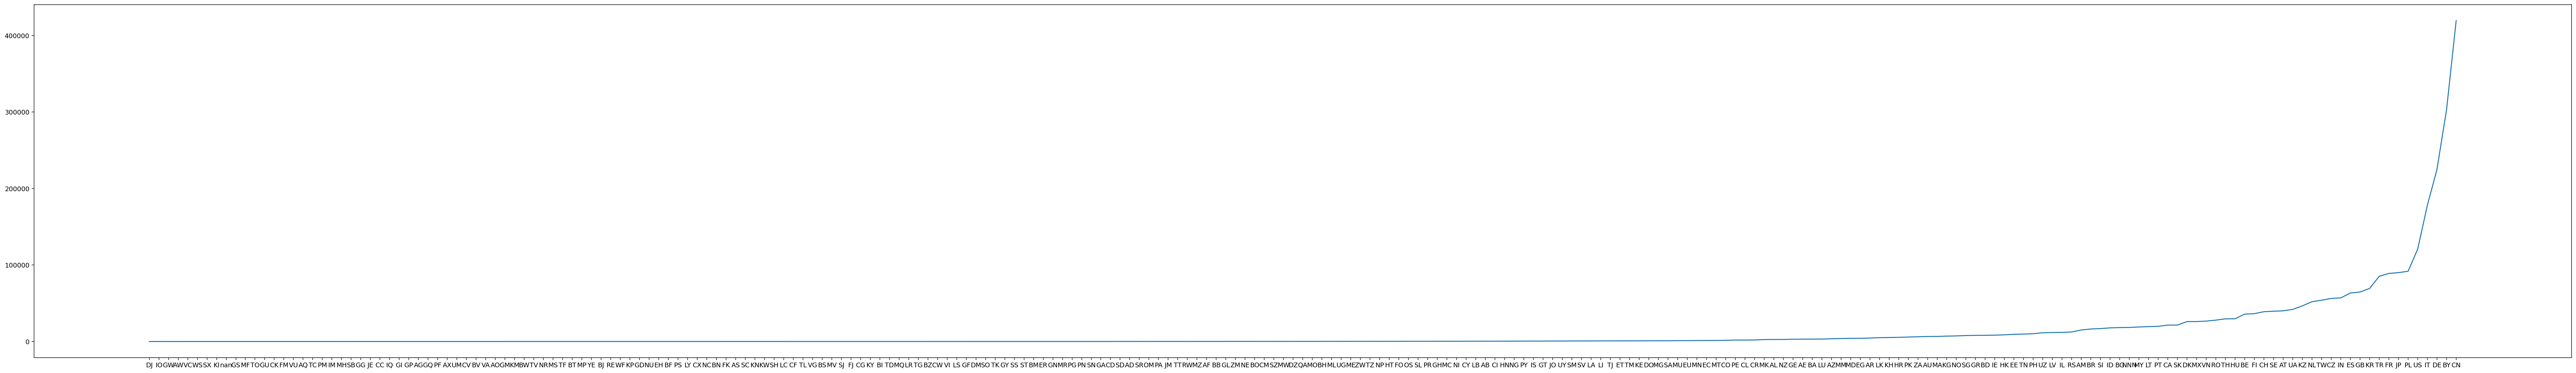

In [101]:
plt.figure(figsize=(70, 10), dpi=180)
plt.plot(list(dict_of_cn_st.keys()), dict_of_cn_st.values())
plt.show()

## Посмотрим на датасет, очищенный от незаполненных кодов

In [23]:
data_new = pd.read_csv('data_cleanKod.csv',index_col=False).drop(columns=['Unnamed: 0', 'Netto', 'Region_s'],axis=1)

In [24]:
data_new['per']=pd.to_datetime(data_new.period, format="%m/%Y")

#### То что в ячейке ниже выполнять в пайплайне предобработки, там же привести все в строчку, чтобы не делать .astype(str). Разделить датасет на 8 частей. Пополам на экспорт, импорт, и еще на 4 каждый по уровням товара

In [25]:
data_new['2-level-tnved'] = data_new['tnved'].astype(str).str.slice(start=0, stop=2)
data_new['4-level-tnved'] = data_new['tnved'].astype(str).str.slice(start=0, stop=4)
data_new['6-level-tnved'] = data_new['tnved'].astype(str).str.slice(start=0, stop=6)
data_new['8-level-tnved'] = data_new['tnved'].astype(str).str.slice(start=0, stop=8)

In [26]:
data_new_ex =  data_new[(data_new['napr'] == 'ЭК')]
data_new_im =  data_new[(data_new['napr'] == 'ИМ')]

In [27]:
data_new_im

,napr,period,nastranapr,tnved,Stoim,Region,per,2-level-tnved,4-level-tnved,6-level-tnved,8-level-tnved
0,ИМ,05/2021,IN,3507909000,3414.01,01000 - АЛТАЙСКИЙ КРАЙ,2021-05-01,35,3507,350790,35079090
10,ИМ,06/2021,KZ,3506100000,91.81,01000 - АЛТАЙСКИЙ КРАЙ,2021-06-01,35,3506,350610,35061000
11,ИМ,07/2021,KZ,3506100000,15.65,01000 - АЛТАЙСКИЙ КРАЙ,2021-07-01,35,3506,350610,35061000
12,ИМ,08/2021,KZ,3506100000,72.38,01000 - АЛТАЙСКИЙ КРАЙ,2021-08-01,35,3506,350610,35061000
13,ИМ,09/2021,KZ,3506100000,142.59,01000 - АЛТАЙСКИЙ КРАЙ,2021-09-01,35,3506,350610,35061000
...,...,...,...,...,...,...,...,...,...,...,...
4905220,ИМ,09/2021,AZ,2716000000,300738.87,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,2021-09-01,27,2716,271600,27160000
4905247,ИМ,07/2021,AZ,2716000000,331783.44,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,2021-07-01,27,2716,271600,27160000
4905267,ИМ,12/2021,AZ,2716000000,320828.78,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,2021-12-01,27,2716,271600,27160000
4905274,ИМ,08/2021,AZ,2716000000,307248.52,45000 - ГОРОД МОСКВА СТОЛИЦА РОССИЙСКОЙ ФЕДЕРА...,2021-08-01,27,2716,271600,27160000


In [74]:
data_new

,napr,period,nastranapr,tnved,Stoim,Region,per,2-level-tnved,4-level-tnved,6-level-tnved,8-level-tnved
0,ИМ,05/2021,IN,3507909000,3414.01,01000 - АЛТАЙСКИЙ КРАЙ,2021-05-01,35,3507,350790,35079090
1,ЭК,02/2021,KZ,3808911000,4020.47,01000 - АЛТАЙСКИЙ КРАЙ,2021-02-01,38,3808,380891,38089110
2,ЭК,04/2021,KZ,3808932700,73875.00,01000 - АЛТАЙСКИЙ КРАЙ,2021-04-01,38,3808,380893,38089327
3,ЭК,09/2021,KZ,3808932700,14184.26,01000 - АЛТАЙСКИЙ КРАЙ,2021-09-01,38,3808,380893,38089327
4,ЭК,12/2021,KZ,3808932700,92.32,01000 - АЛТАЙСКИЙ КРАЙ,2021-12-01,38,3808,380893,38089327
...,...,...,...,...,...,...,...,...,...,...,...
4905286,ЭК,01/2021,FI,2716000000,4148703.22,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,2021-01-01,27,2716,271600,27160000
4905287,ЭК,02/2021,FI,2716000000,2634686.27,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,2021-02-01,27,2716,271600,27160000
4905288,ЭК,08/2021,FI,2716000000,2157582.40,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,2021-08-01,27,2716,271600,27160000
4905289,ЭК,05/2021,FI,2716000000,2885248.57,40000 - ГОРОД САНКТ-ПЕТЕРБУРГ ГОРОД ФЕДЕРАЛЬНО...,2021-05-01,27,2716,271600,27160000


## Функция сортировки датасета в зависимости от выбранных параметров

In [123]:
def get_request_by_region(data_new,code='all', region='all', country='all', per_in_month=36):
    date_per = pd.to_datetime(str(datetime.date.today() - relativedelta(months=per_in_month)))
    list_of_napr = []
    if code=='all':
        if region == 'all' and country == 'all':
            for napr in ['ИМ','ЭК']:
                list_of_napr.append(data_new[(data_new['napr'] == napr) & (data_new['per'] > date_per)].groupby(["nastranapr"]).Stoim.sum().reset_index().sort_values('Stoim',ascending=False).set_index("nastranapr"))
#                 list_of_napr.append(data_new[(data_new['napr'] == napr) & (data_new['per'] > date_per)].groupby(["nastranapr"]).Stoim.sum().reset_index().sort_values('Stoim',ascending=False).set_index("tnved"))
            return list_of_napr
        if country != 'all' and region == 'all':
            for napr in ['ИМ','ЭК']:
                list_of_napr.append(data_new[(data_new['nastranapr'] == country) & (data_new['napr'] == napr) & (data_new['per'] > date_per)].groupby(["Region"]).Stoim.sum().reset_index().sort_values('Stoim',ascending=False).set_index("Region"))
                list_of_napr.append(data_new[(data_new['nastranapr'] == country) & (data_new['napr'] == napr) & (data_new['per'] > date_per)].groupby(["tnved"]).Stoim.sum().reset_index().sort_values('Stoim',ascending=False).set_index("tnved"))
            return list_of_napr  
        if region != 'all' and country == 'all':
            for napr in ['ИМ','ЭК']:
                list_of_napr.append(data_new[(data_new['Region'] == region) & (data_new['napr'] == napr) & (data_new['per'] > date_per)].groupby(["nastranapr"]).Stoim.sum().reset_index().sort_values('Stoim',ascending=False).set_index("nastranapr"))
                list_of_napr.append(data_new[(data_new['Region'] == region) & (data_new['napr'] == napr) & (data_new['per'] > date_per)].groupby(["tnved"]).Stoim.sum().reset_index().sort_values('Stoim',ascending=False).set_index("tnved"))
            return  list_of_napr
    
    if code!='all':
        for c in code:
            if region == 'all' and country == 'all':
                for napr in ['ИМ','ЭК']:
                    list_of_napr.append(data_new[(data_new['napr'] == napr) & (data_new['per'] > date_per) & (data_new['tnved'].astype(str) == c)].groupby(["nastranapr"]).Stoim.sum().reset_index().sort_values('Stoim',ascending=False).set_index("nastranapr"))
                    list_of_napr.append(data_new[(data_new['napr'] == napr) & (data_new['per'] > date_per) & (data_new['tnved'].astype(str) == c)].groupby(["Region"]).Stoim.sum().reset_index().sort_values('Stoim',ascending=False).set_index("Region"))
                return list_of_napr
            if country != 'all' and region == 'all':
                for napr in ['ИМ','ЭК']:
                    list_of_napr.append(data_new[(data_new['nastranapr'] == country) & (data_new['napr'] == napr) & (data_new['per'] > date_per) & (data_new['tnved'].astype(str) == c)].groupby(["Region"]).Stoim.sum().reset_index().sort_values('Stoim',ascending=False).set_index("Region"))
                return list_of_napr  
            if region != 'all' and country == 'all':
                for napr in ['ИМ','ЭК']:
                    list_of_napr.append(data_new[(data_new['Region'] == region) & (data_new['napr'] == napr) & (data_new['per'] > date_per) & (data_new['tnved'].astype(str) == c)].groupby(["nastranapr"]).Stoim.sum().reset_index().sort_values('Stoim',ascending=False).set_index("nastranapr"))
                return  list_of_napr



In [124]:
%%time
df_top_n = get_request_by_region(data_new, code=['3507909000','2716000000'], region='all', country='all', per_in_month=25)

CPU times: total: 6.81 s
Wall time: 6.81 s


In [129]:
df_top_n[0]

,Stoim
nastranapr,
DK,1.024619e+08
CN,2.460911e+07
FI,1.863046e+07
DE,1.039773e+07
FR,1.029765e+07
US,4.794203e+06
ES,4.442786e+06
BE,4.162037e+06
GB,2.454650e+06


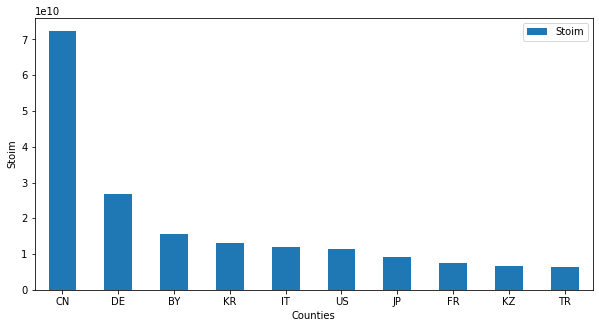

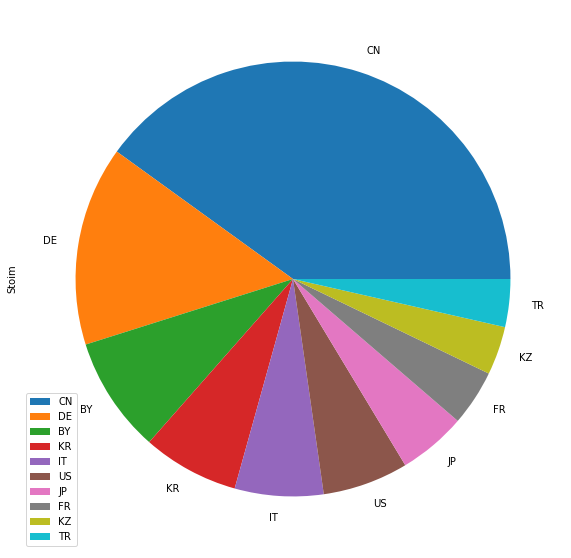

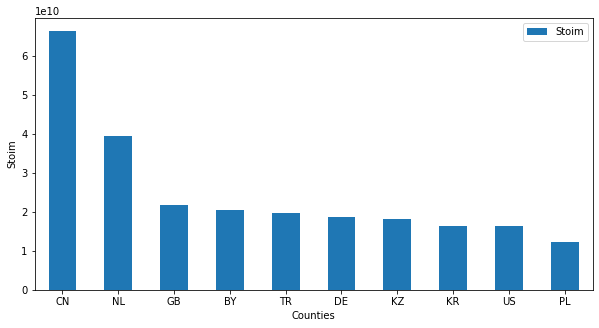

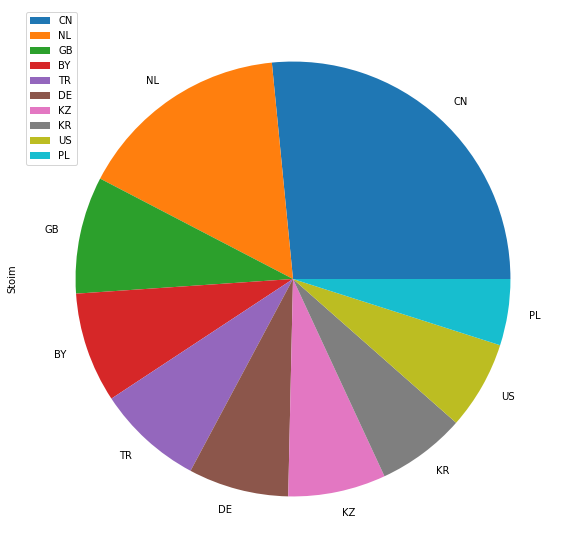

In [51]:
for plot_n in df_top_n:
    plot_n.plot.bar(figsize=(10, 5),xlabel='Counties', ylabel='Stoim',rot=0)
    plot_n.plot.pie(y='Stoim', figsize=(10, 10))

In [129]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4905291 entries, 0 to 4905290
Data columns (total 9 columns):
 #   Column      Dtype         
---  ------      -----         
 0   napr        object        
 1   period      object        
 2   nastranapr  object        
 3   tnved       int64         
 4   Stoim       float64       
 5   Netto       float64       
 6   Region      object        
 7   Region_s    object        
 8   per         datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 336.8+ MB
